In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

In [17]:
(all_images, all_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
all_images = all_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [19]:
num_classes = 10
encoded_labels = to_categorical(all_labels, num_classes)
test_encoded_labels = to_categorical(test_labels, num_classes)

In [20]:
train_images, val_images, train_labels, val_labels = train_test_split(
    all_images, encoded_labels, test_size=0.2, random_state=42
)

In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8772 - loss: 0.4073 - val_accuracy: 0.9808 - val_loss: 0.0640
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9819 - loss: 0.0600 - val_accuracy: 0.9856 - val_loss: 0.0480
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9880 - loss: 0.0412 - val_accuracy: 0.9857 - val_loss: 0.0446
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9883 - val_loss: 0.0372
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9927 - loss: 0.0234 - val_accuracy: 0.9872 - val_loss: 0.0399
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9945 - loss: 0.0176 - val_accuracy: 0.9879 - val_loss: 0.0418
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9960 - loss: 0.0139 - val_accuracy: 0.9888 - val_loss: 0.0385
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9968 - loss: 0.0109 

In [23]:
loss, accuracy = model.evaluate(test_images, test_encoded_labels, verbose=0)
print(f'테스트 손실: {loss:.4f}')
print(f'테스트 정확도: {accuracy:.4f}')

테스트 손실: 0.0408
테스트 정확도: 0.9890


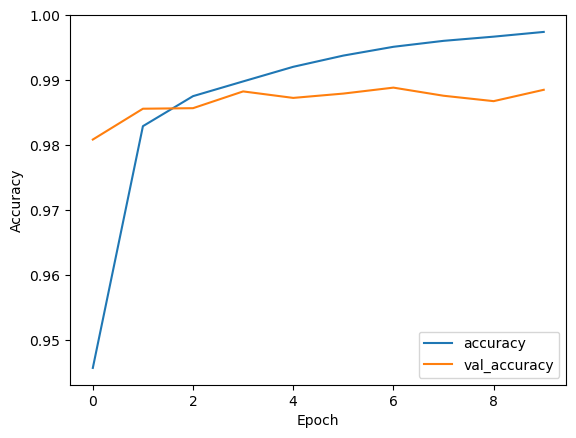

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [25]:
predictions_categorical = model.predict(test_images)
predictions = np.argmax(predictions_categorical, axis=1)

cm = confusion_matrix(test_labels, predictions)
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ 977,    1,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1132,    2,    0,    0,    0,    0,    0,    1,    0],
       [   2,    1, 1023,    0,    1,    0,    1,    2,    2,    0],
       [   1,    0,    2, 1000,    0,    5,    0,    0,    2,    0],
       [   0,    0,    0,    0,  976,    0,    0,    1,    1,    4],
       [   3,    0,    0,    4,    0,  882,    1,    0,    2,    0],
       [   7,    3,    1,    0,    2,    5,  938,    0,    2,    0],
       [   1,    3,    6,    0,    1,    0,    0, 1014,    2,    1],
       [   8,    0,    1,    0,    1,    1,    0,    0,  961,    2],
       [   3,    2,    1,    0,    5,    5,    0,    6,    0,  987]],
      dtype=int64)